<a href="https://colab.research.google.com/github/havriutkin/ddl-copmilers-course-2024/blob/main/HaystackNeedle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive algorithm

This algorithm iterates through the text and checks for the pattern by comparing characters one by one. The worst-case time complexity of this approach is O(n * m), where `n` is the length of the text and `m` is the length of the pattern.


In [ ]:
def naive_substring_search(text, pattern):
    # Get the lengths of the text and the pattern
    text_length = len(text)
    pattern_length = len(pattern)
    result = []

    # Loop through the text
    for i in range(text_length - pattern_length + 1):
        # For the current index, check if the substring matches the pattern
        match = True
        for j in range(pattern_length):
            if text[i + j] != pattern[j]:
                match = False
                break

        # If a match is found, print the index
        if match:
          result.append(i)

    return result

# Example usage
array = [231237813910923]
text = "this is a ssssssssssssimple example"
pattern = "simple"

naive_substring_search(text, pattern)


[21]

https://www.youtube.com/watch?v=O7_w001f58c
### Aho–Corasick Algorithm Overview for Collaboration Notebook

The **Aho–Corasick algorithm** is a powerful string-searching algorithm, particularly efficient when searching for multiple patterns in a text simultaneously. It constructs a finite state machine (FSM) from a set of keywords, and then it uses the FSM to search the text in a single pass. This makes it faster than naive algorithms in the case of multiple pattern searches.

#### Key Concepts:

1. **Trie Construction**: The algorithm first builds a trie (prefix tree) from the set of patterns. Each node in the trie represents a character in a pattern, and paths from the root to a node represent prefixes of patterns.

2. **Failure Links**: To handle mismatches, the algorithm adds failure links. These links define where to continue searching when a partial match is found but not completed.

3. **Output Links**: The trie also maintains output links, which allow the algorithm to report when a match is found. If a match is found at a node, the output link helps retrieve the matched pattern(s).

4. **FSM Execution**: After constructing the trie with failure and output links, the text is processed in a single pass. As the algorithm processes each character of the text, it navigates the trie by following appropriate transitions. If a character doesn't match, the failure links are followed to find the next best match.

#### Algorithm Steps:

1. **Build the Trie**:
   - Insert all patterns into a trie.
   - Each pattern corresponds to a path in the trie.

2. **Add Failure Links**:
   - For each node in the trie, a failure link is added to point to the node representing the longest suffix of the current node's string, which is also a prefix in the trie.

3. **Search Text Using FSM**:
   - Traverse the text character by character, following the trie.
   - If a mismatch occurs, use the failure links to backtrack.
   - Report matches using output links when reaching terminal nodes.

#### Time Complexity:
- **Trie construction**: O(m), where `m` is the total number of characters in all patterns.
- **Search**: O(n + z), where `n` is the length of the text, and `z` is the number of pattern occurrences found.

#### Code Example (Python):



In [ ]:
from collections import deque, defaultdict

class AhoCorasick:
    def __init__(self, keywords):
        self.trie = {}
        self.output = defaultdict(list)
        self.fail = {}
        self.build_trie(keywords)
        self.build_failure_links()

    def build_trie(self, keywords):
        self.trie = {}
        node = 0
        self.trie[node] = {}
        for keyword in keywords:
            current_node = 0
            for char in keyword:
                if char not in self.trie[current_node]:
                    node += 1
                    self.trie[current_node][char] = node
                    self.trie[node] = {}
                current_node = self.trie[current_node][char]
            self.output[current_node].append(keyword)

    def build_failure_links(self):
        queue = deque()
        for char in self.trie[0]:
            queue.append(self.trie[0][char])
            self.fail[self.trie[0][char]] = 0

        while queue:
            current_node = queue.popleft()
            for char in self.trie[current_node]:
                child_node = self.trie[current_node][char]
                queue.append(child_node)

                fail_node = self.fail[current_node]
                while fail_node != 0 and char not in self.trie[fail_node]:
                    fail_node = self.fail[fail_node]

                self.fail[child_node] = self.trie[fail_node].get(char, 0)
                self.output[child_node].extend(self.output[self.fail[child_node]])

    def search(self, text):
        current_node = 0
        matches = []
        for i, char in enumerate(text):
            while current_node != 0 and char not in self.trie[current_node]:
                current_node = self.fail[current_node]
            current_node = self.trie[current_node].get(char, 0)
            if self.output[current_node]:
                for pattern in self.output[current_node]:
                    matches.append((i - len(pattern) + 1, pattern))
        return matches

# Example usage:
patterns = ["he", "she", "his", "hers"]
text = "ahishers"
ac = AhoCorasick(patterns)
result = ac.search(text)
print(result)

[(1, 'his'), (3, 'she'), (4, 'he'), (4, 'hers')]


#### Output:

```
[(1, 'his'), (3, 'she'), (4, 'he'), (4, 'hers')]
```

This Python implementation of the Aho–Corasick algorithm builds the trie, sets up the failure links, and then searches the input text for matches of the patterns efficiently.

#### Use Case:

The Aho–Corasick algorithm is especially useful when searching for many patterns in a large text. It finds all occurrences of all patterns in the text simultaneously, making it ideal for applications such as keyword searching in databases, spell-checking, and DNA sequence analysis.

This description and code should be ideal for a collaborative notebook setup.

https://www.youtube.com/watch?v=EL4ZbRF587g
### Knuth–Morris–Pratt (KMP) Algorithm

This is a well-structured description and implementation for the **Knuth–Morris–Pratt (KMP) algorithm**. The KMP algorithm efficiently searches for a pattern in a text by preprocessing the pattern to build the **Longest Prefix Suffix (LPS)** array. The algorithm avoids unnecessary comparisons by leveraging this LPS array.

#### Key Concepts

1. **LPS Array**: The core of the KMP algorithm is the LPS (Longest Prefix Suffix) array, which stores the length of the longest prefix which is also a suffix for all prefixes of the pattern. This helps in skipping unnecessary comparisons.

2. **Efficient Search**: Once the LPS array is constructed, the pattern is compared against the text. Whenever a mismatch occurs, the LPS array is used to decide how much to skip without rechecking characters.

3. **Time Complexity**:
   - **Preprocessing (LPS)**: O(m), where `m` is the length of the pattern.
   - **Search**: O(n), where `n` is the length of the text.

#### Steps:

1. **Build the LPS Array**: Preprocess the pattern to construct the LPS array.
2. **Search**: Use the LPS array to efficiently search the pattern in the text.

#### Python Code Implementation:

In [ ]:
# 1. Function to compute the Longest Prefix Suffix (LPS) array
def compute_lps(pattern):
    """
    Preprocess the pattern to create the LPS array that holds the longest
    prefix suffix values for the pattern.
    """
    m = len(pattern)
    lps = [0] * m  # Initialize the LPS array with zeros
    length = 0  # Length of the previous longest prefix suffix
    i = 1  # Start from the second character

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

# 2. Knuth–Morris–Pratt (KMP) Search Algorithm
def kmp_search(text, pattern):
    """
    The KMP search algorithm that uses the LPS array to find occurrences
    of the pattern in the text.
    """
    n = len(text)
    m = len(pattern)
    lps = compute_lps(pattern)  # Preprocess the pattern
    i = 0  # Index for text
    j = 0  # Index for pattern
    result = []  # To store the indices of pattern matches

    while i < n:
        if text[i] == pattern[j]:
            i += 1
            j += 1

        if j == m:
            result.append(i - j)
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return result


### Example Usage:

Let's see how the KMP algorithm can be used to search for a pattern in a text:

```python
# Example text and pattern
text = "ababcabcabababd"
pattern = "ababd"

# Running the KMP search
matches = kmp_search(text, pattern)

# Display the result
print(f"Pattern found at indices: {matches}")
```

#### Output:
```
Pattern found at indices: [10]
```

In this case, the pattern "ababd" is found at index 10 in the text.

### Visualization of the LPS Array (Optional):

To better understand the role of the LPS array, let's visualize it using a simple chart.

```python
import matplotlib.pyplot as plt

def visualize_lps(pattern):
    lps = compute_lps(pattern)
    plt.bar(range(len(lps)), lps, tick_label=list(pattern))
    plt.xlabel('Pattern Characters')
    plt.ylabel('LPS Values')
    plt.title(f'LPS Array for Pattern: {pattern}')
    plt.show()

# Visualize the LPS array for the given pattern
visualize_lps(pattern)
```

This will create a bar chart representing the LPS array for the pattern, giving a clear visualization of how the longest prefix that is also a suffix evolves for each prefix of the pattern.

### Conclusion:

The **Knuth–Morris–Pratt (KMP) algorithm** is an efficient string-searching algorithm that improves over naive string-matching approaches by preprocessing the pattern using the **LPS array**. This preprocessing helps to skip unnecessary character comparisons, making the algorithm operate in **O(n + m)** time complexity.

## Testing

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# 1. Function to generate random text and patterns
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))

# 2. Function to test performance of different algorithms
def test_performance(substring_search_function, text_lengths, pattern_length, num_trials=5):
    times = []

    # Run the test for each text length
    for length in text_lengths:
        total_naive_time = 0
        total_kmp_time = 0
        for _ in range(num_trials):
            text = generate_random_string(length)
            pattern = generate_random_string(pattern_length)

            # Measure time
            start_time = time.time()
            substring_search_function(text, pattern)
            total_naive_time += time.time() - start_time

        # Average time over all trials
        times.append(total_naive_time / num_trials)

    return times

# 3. Visualization of the performance results
def plot_performance(text_lengths, times_several):
    for label, times in times_several.items():
      plt.plot(text_lengths, times, label=label, marker='o')
    plt.xlabel('Text Length')
    plt.ylabel('Average Time (seconds)')
    plt.title('Performance Comparison of Substring Search Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

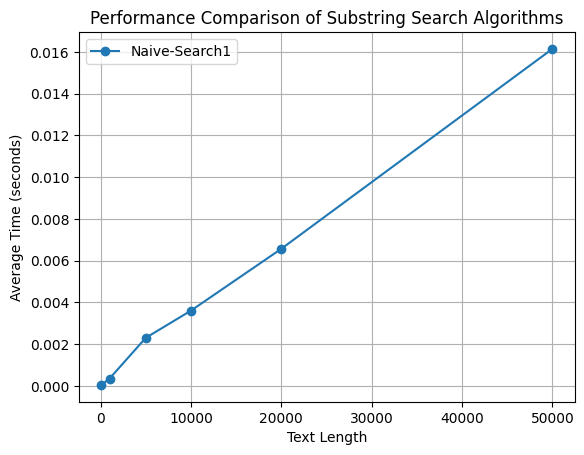

In [ ]:
# 4. Running the performance test
text_lengths = [100, 1000, 5000, 10000, 20000, 50000]  # Varying text lengths
pattern_length = 10  # Fixed pattern length for testing
num_trials = 3  # Number of trials for averaging


substring_search_function = lambda text, pattern: naive_substring_search(text, pattern)

# substring_search_function = lambda text, pattern:  AhoCorasick([pattern]).search(text)

# substring_search_function = lambda text, pattern: kmp_search(text, pattern)

times = test_performance(substring_search_function, text_lengths, pattern_length, num_trials)

# Plot the results
plot_performance(text_lengths, {"Naive-Search1":times})

# 1. Boyer–Moore string-search algorithm

The algorithm preprocesses the string being searched for (the pattern), but not the string being searched in (the text). It is thus well-suited for applications in which the pattern is much shorter than the text or where it persists across multiple searches. The Boyer–Moore algorithm uses information gathered during the preprocess step to skip sections of the text, resulting in a lower constant factor than many other string search algorithms. In general, the algorithm runs faster as the pattern length increases. The key features of the algorithm are to match on the tail of the pattern rather than the head, and to skip along the text in jumps of multiple characters rather than searching every single character in the text.

In [ ]:
def create_shift_dict(pattern):
  """
    Creates a dictionary that contains index of the last occurence
    of each character in the pattern.
  """
  result = {}

  for i in range(len(pattern)):
    result[pattern[i]] = i

  return result

def boyer_moore_search(text, pattern):
  """
    Performs Boyer-Moore Search. Returns list of indicies where pattern matched
  """
  result = [] # List of indicies where pattern mathches

  pat_size = len(pattern)
  txt_size = len(text)

  shift_dict = create_shift_dict(pattern)

  shift = 0 # Initial shift is zero
  while shift <= txt_size - pat_size:
    i = pat_size - 1

    # Compare pattern with text, starting from the last character of the pattern
    while i >= 0 and text[shift + i] == pattern[i]:
      i -= 1

    # If i < 0, it means that pattern matched:
    if i < 0:
      result.append(shift)

      # Index of the next character in the string
      next_index = shift + pat_size + 1
      if next_index >= txt_size:
        return result


      # If character is in the pattern - look up shift
      if (text[next_index] in shift_dict):
        # If there is no space for shit - shit by 1
        shift_change = pat_size - shift_dict[text[next_index]] if shift + pat_size < txt_size else 1
      # If character is not in the pattern - shift by the length of the pattern
      else:
        shift_chage = pat_size + 1 if shift + pat_size < txt_size else 1

      shift += shift_change
    # If i >= 0, it means that pattern did not match
    else:
      curr_index = shift + i

      shift_change = 0 # Init with zero

      # If character occurs in the pattern - look up shift in dictionary
      #   If there is not enough space for shift - shift by 1
      if text[curr_index] in shift_dict:
        shift_change = max(1, i - shift_dict[text[curr_index]])
      # If character is no in the pattern - shift the whole pattern to the next
      #   character. If there is not enough space for shift - shift by 1
      else:
        shift_change = max(1, i + 1)

      shift += shift_change
  return result



## Example Usage

In [ ]:
text = "ABAAABCD"
pattern = "ABC"
res = boyer_moore_search(text, pattern)
print("Pattern matched at indicies: ", res)

Pattern matched at indicies:  [4]


In [ ]:
text = "ababcabcabababd"
pattern = "ababd"
res = boyer_moore_search(text, pattern)
print("Pattern matched at indicies: ", res)

Pattern matched at indicies:  [10]


# 2. Testing of all algos (+ improve testing code)


First, we will create function that allows us to generate strings of different sizes with patterns at the given indices

In [ ]:
import string
import random

def generate_input_string_with_pattern(size, pattern, indices):
  """
  Function takes size, pattern and indices.
  Return random string S with following properties:
    1. len(S) = size
    2. For each index i in indicies:
        S[i : i + j] = pattern,
        where j = len(pattern)
  If pattern equals empty string - just returns random string of length size
  """

  # Check that size is positive
  if size < 0:
    raise ValueError("Invalid size property for generate_input_string_with_pattern()")
  if size == 0:
    return ""

  # If pattern is empty string - return random string of length size
  if pattern == "":
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(size))

  # Check if indicies are at least len(pattern) appart, and within bounds
  pattern_length = len(pattern)
  indices = sorted(indices)
  prev_index = -pattern_length

  for i in indices:
    if i < 0 or i + pattern_length > size:
        raise ValueError("Invalid index in indices for generate_input_string_with_pattern()")

    if i < prev_index + pattern_length:
        raise ValueError("Indices overlap for the given pattern.")

    prev_index = i

  # Generate string of given size
  S = [random.choice(string.ascii_lowercase) for _ in range(size)]

  # Insert the pattern at the specified indices
  for i in indices:
      for j in range(pattern_length):
        S[i + j] = pattern[j]

  return ''.join(S)

# Example of usage
size = 30
pattern = 'abc'
indices = [5, 12, 20]

result = generate_input_string_with_pattern(size, pattern, indices)
print(f"Generated string: {result}")
print(f"Pattern '{pattern}' inserted at indices {indices}")

Generated string: uawknabcedwxabcxjuslabcvbpdlap
Pattern 'abc' inserted at indices [5, 12, 20]


In [ ]:
import time

def perform_test(algorithm, text, pattern, answer):
    """
    Function takes an algorithm function, text, pattern, and expected answer.
    Raises an error if the algorithm's output doesn't match the expected answer.
    Returns the time used by the algorithm in seconds.
    """
    start_time = time.perf_counter()
    result = algorithm(text, pattern)
    end_time = time.perf_counter()
    time_used = end_time - start_time

    # Sort answer and result
    result = sorted(result)
    answer = sorted(answer)

    # Check if result and answer match
    if len(result) != len(answer):
      raise ValueError(f"Algorithm output does not match expected answer.\nExpected: {answer}\nGot: {result}")

    for i in range(len(result)):
      if result[i] != answer[i]:
        raise ValueError(f"Algorithm output does not match expected answer.\nExpected: {answer}\nGot: {result}")

    return time_used


In [ ]:
import random
import string


def test_algorithm_for_different_sizes(algorithm, algorithm_name="NONE"):
  """
  Function takes an algorithm and performs tests on texts and patterns of
  different sizes.
  Returns a dictionary in the format:
  (text_size, pattern_size): time_taken
  """
  sizes = [10, 100, 1000, 5000, 10000, 25000, 50000, 75000, 100000, 200000, 500000, 800000, 1000000]
  results = {}

  for text_size in sizes:
    for pattern_size in sizes:
      # Skip cases where pattern size is greater than text size
      if pattern_size > text_size:
          continue

      # Generate a random pattern of the given size
      pattern = ''.join(random.choice(string.ascii_lowercase) for _ in range(pattern_size))

      # Generate few indicies to insert the pattern
      max_possible_indices = (text_size - pattern_size) // pattern_size + 1
      num_indices = min(5, max_possible_indices)  # Limit to 5
      indices = []

      if num_indices > 0:
        possible_indices = list(range(0, text_size - pattern_size + 1))

        while len(indices) < num_indices and possible_indices:
          index = random.choice(possible_indices)
          indices.append(index)

          # Remove  overlapping indicies
          possible_indices = [i for i in possible_indices if abs(i - index) >= pattern_size]

        indices.sort()
      else:
        # Just pick one possible index
        index = random.randint(0, text_size - pattern_size)
        indices = [index]


      # Generate the text with the pattern inserted at the specified index
      text = generate_input_string_with_pattern(text_size, pattern, indices)
      expected_answer = indices

      # Run test
      try:
        time_used = perform_test(algorithm, text, pattern, expected_answer)
        results[(text_size, pattern_size)] = time_used
      except ValueError as e:
        # If the algorithm fails, record None and print the error
        results[(text_size, pattern_size)] = None
        print(f"{algorithm_name} failed for text_size={text_size}, pattern_size={pattern_size}: {e}")

  return results


In [ ]:
def test_all():
  """
  Function tests all three algorithms, and saves results in a dict:
  [algo_name]: result_dict
  """

  algorithms = {
    "Naive": naive_substring_search,
    "Boyer-Moore": boyer_moore_search,
    "Knuth-Moris": kmp_search,
  }

  all_results = {}
  for algo_name, algo_func in algorithms.items():
    print(f"Testing {algo_name} algorithm...")
    result_dict = test_algorithm_for_different_sizes(algo_func)
    all_results[algo_name] = result_dict
  return all_results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_results(results):
    """
    Function to visualize the results of algorithm performance tests.
    It takes a dictionary with algorithm names as keys and their result dictionaries as values.
    Plots the execution times across different text and pattern sizes.
    Each pattern size will have its own separate plot.
    """
    # Extract the list of algorithms, text sizes, and pattern sizes
    algorithms = list(results.keys())
    sizes = [10, 100, 1000, 5000, 10000, 25000, 50000, 75000, 100000, 200000, 500000, 800000, 1000000]

    # For each pattern size, create a separate plot
    for pattern_size in sizes:
        plt.figure(figsize=(10, 6))
        plt.title(f'Algorithm Performance Comparison for Pattern Size: {pattern_size}', fontsize=16)
        plt.xlabel('Text Size', fontsize=14)
        plt.ylabel('Time Taken (seconds)', fontsize=14)
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, which="both", ls="--")
        text_sizes = sizes

        # Plot data for each algorithm
        for algo_name in algorithms:
            time_taken = []
            available_text_sizes = []
            for text_size in text_sizes:
                key = (text_size, pattern_size)
                if key in results[algo_name]:
                    time = results[algo_name][key]
                    if time is not None:
                        time_taken.append(time)
                        available_text_sizes.append(text_size)
                    else:
                        # Skip this point if time is None
                        pass
                else:
                    # Skip this point if the key is not in results
                    pass

            if time_taken:
                plt.plot(available_text_sizes, time_taken, marker='o', label=algo_name)
            else:
                # No data for this algorithm at this pattern size
                pass

        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()


In [ ]:
# Actually testing
all_results = test_all()

Testing Naive algorithm...
Testing Boyer-Moore algorithm...
Testing Knuth-Moris algorithm...


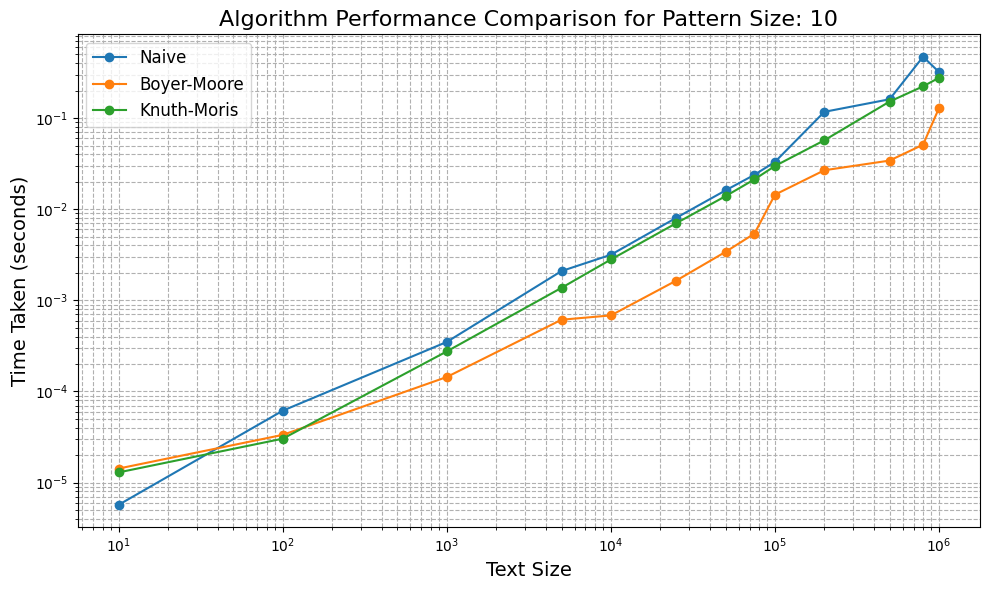

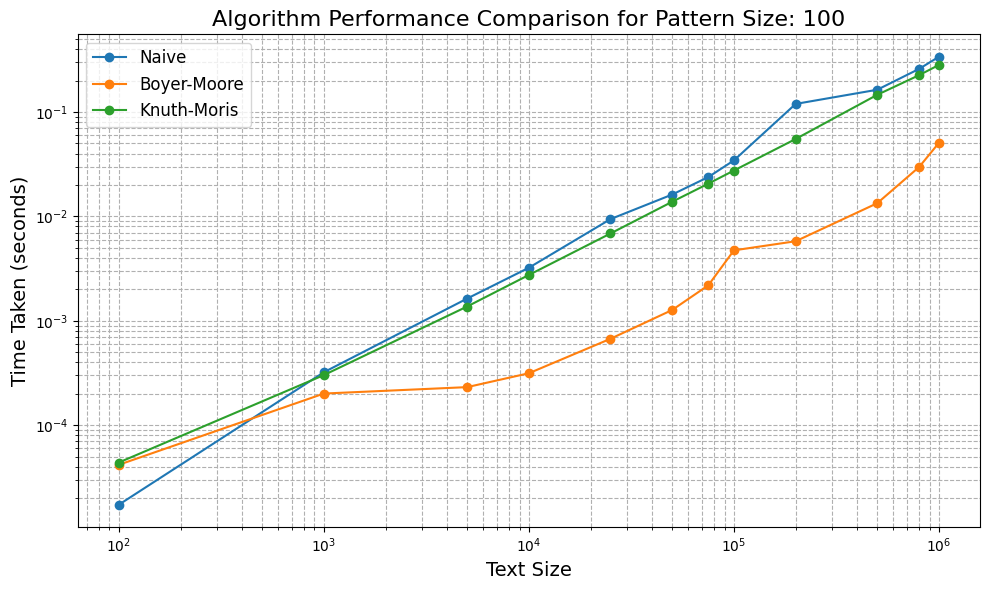

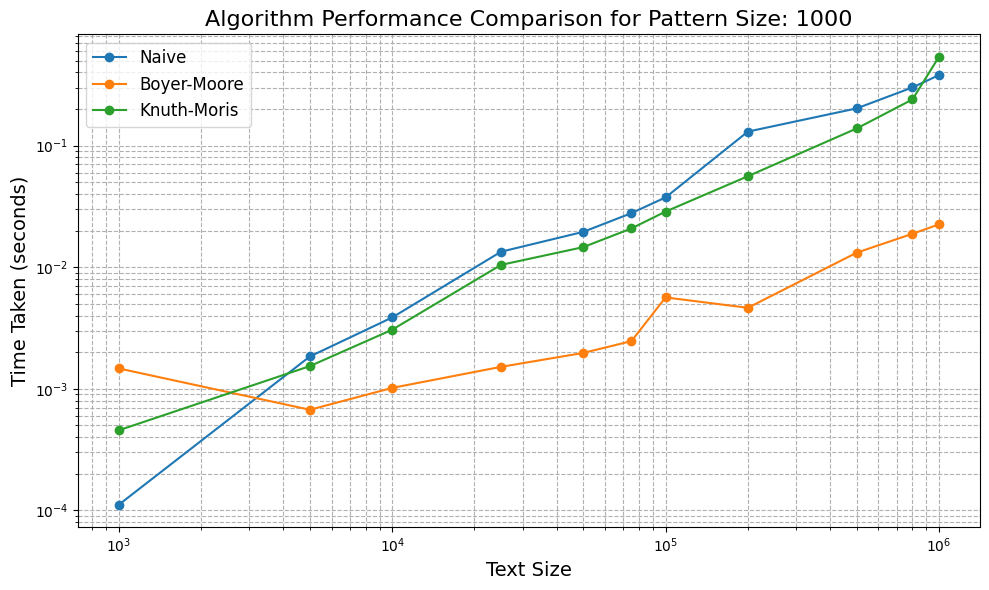

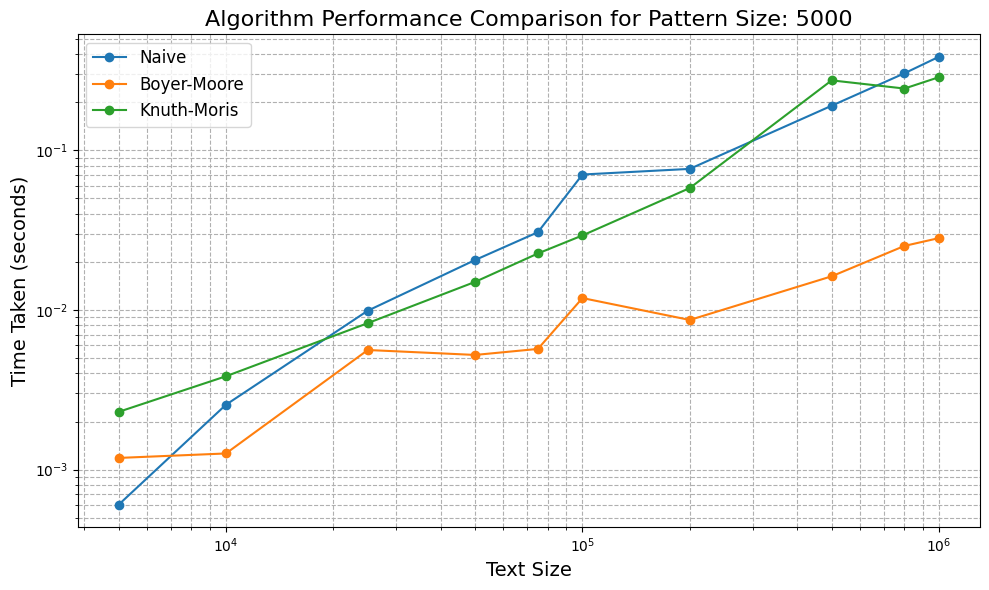

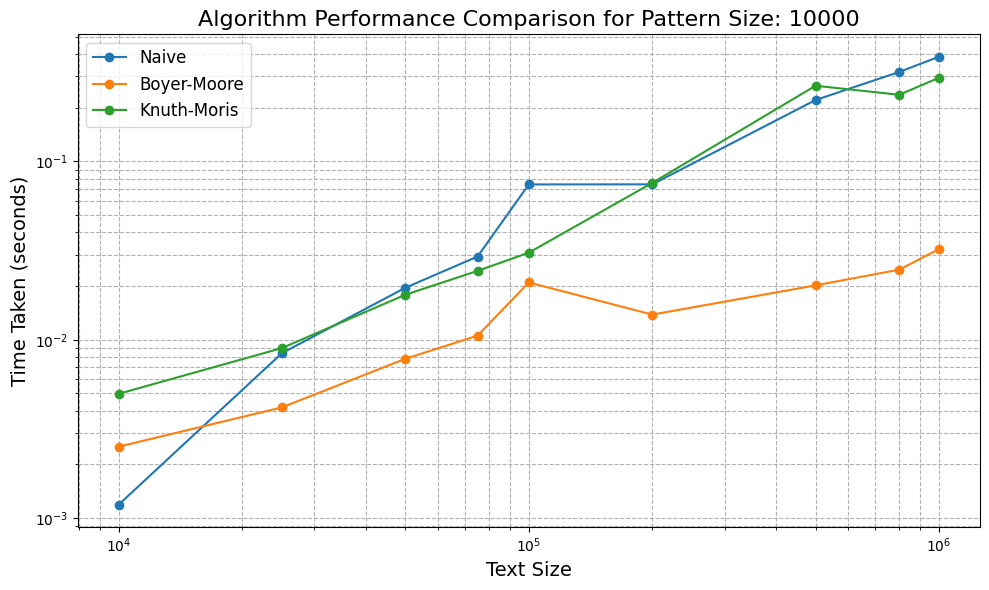

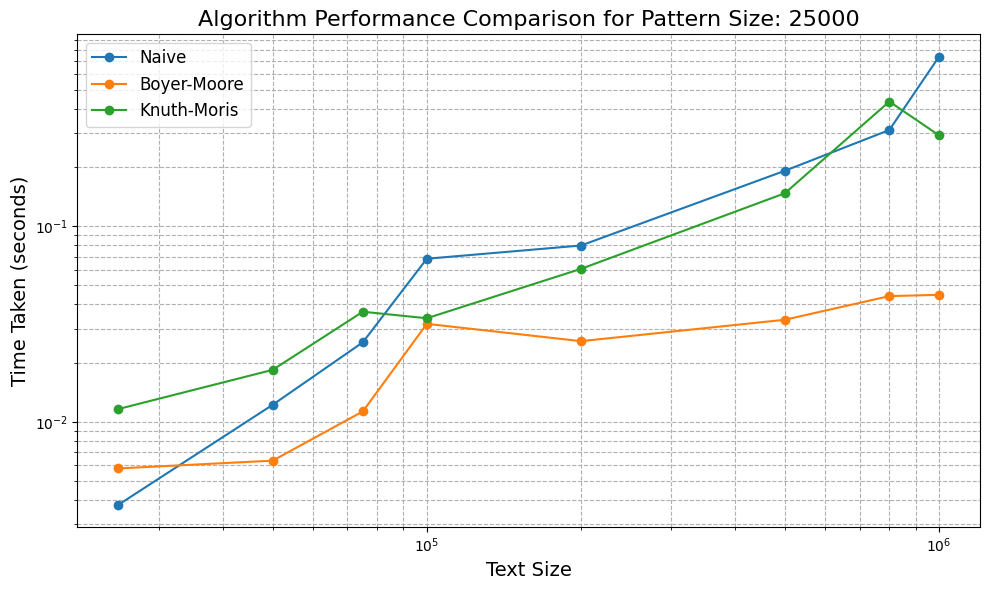

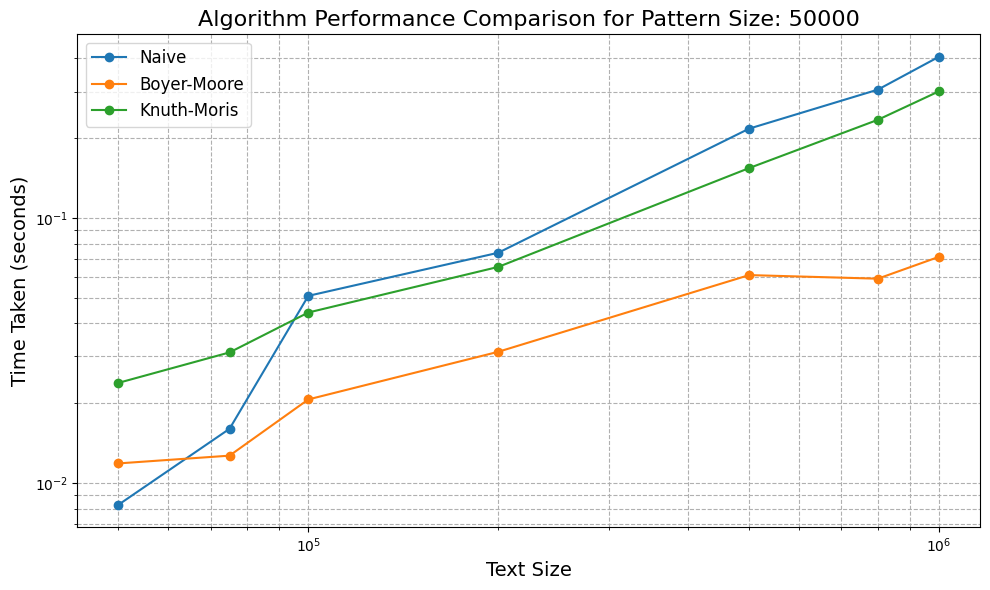

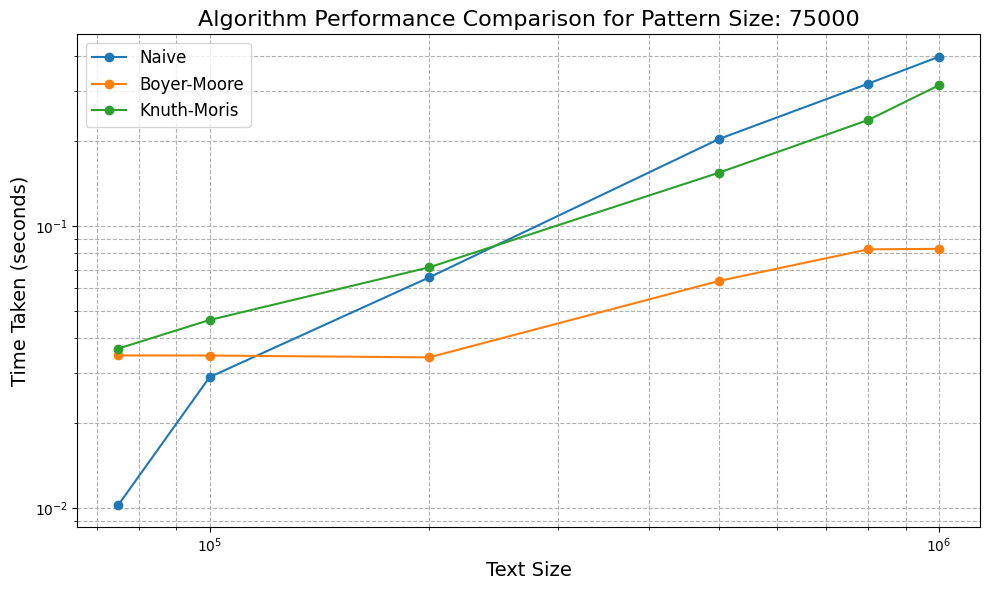

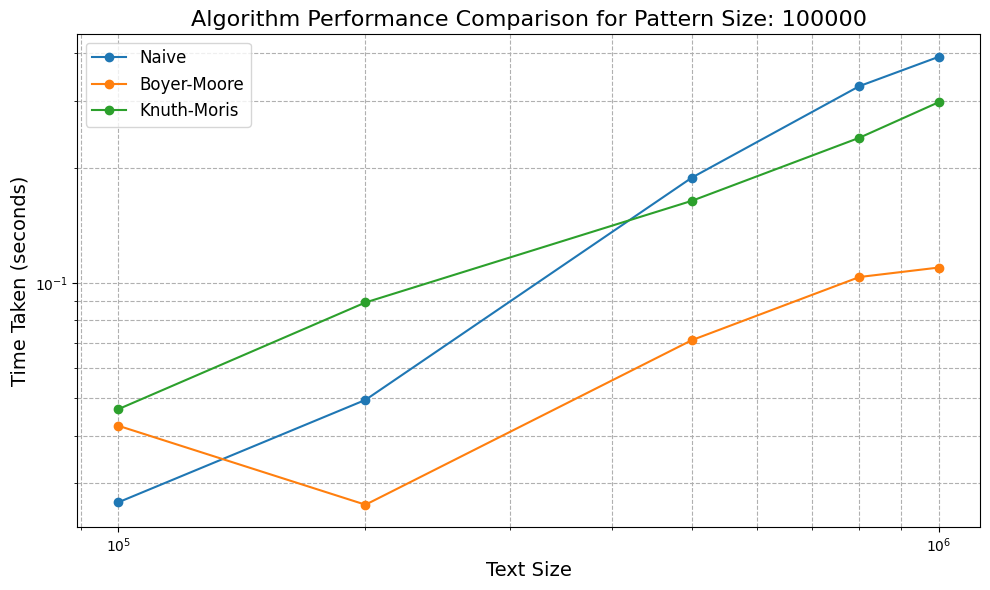

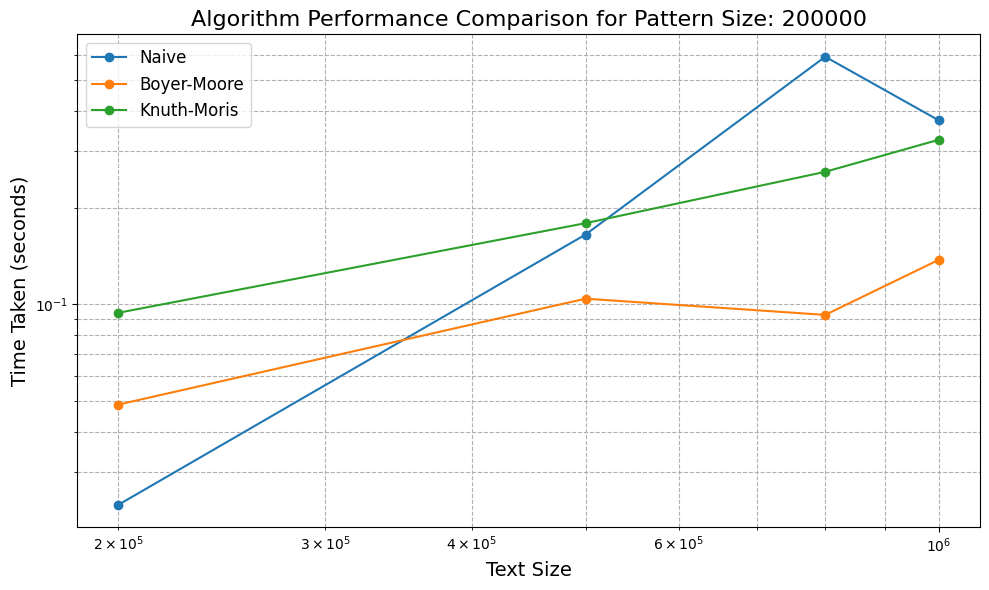

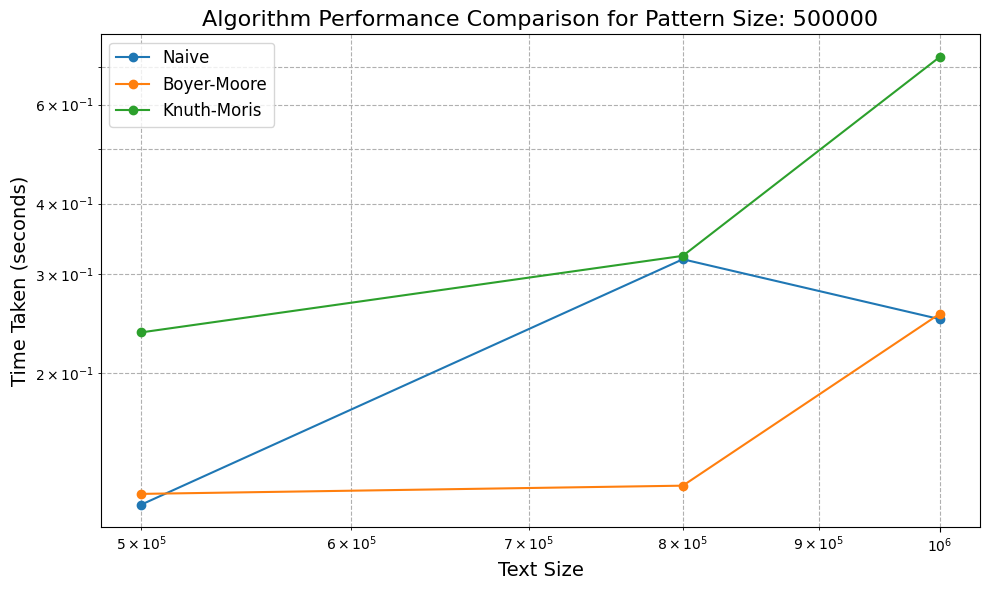

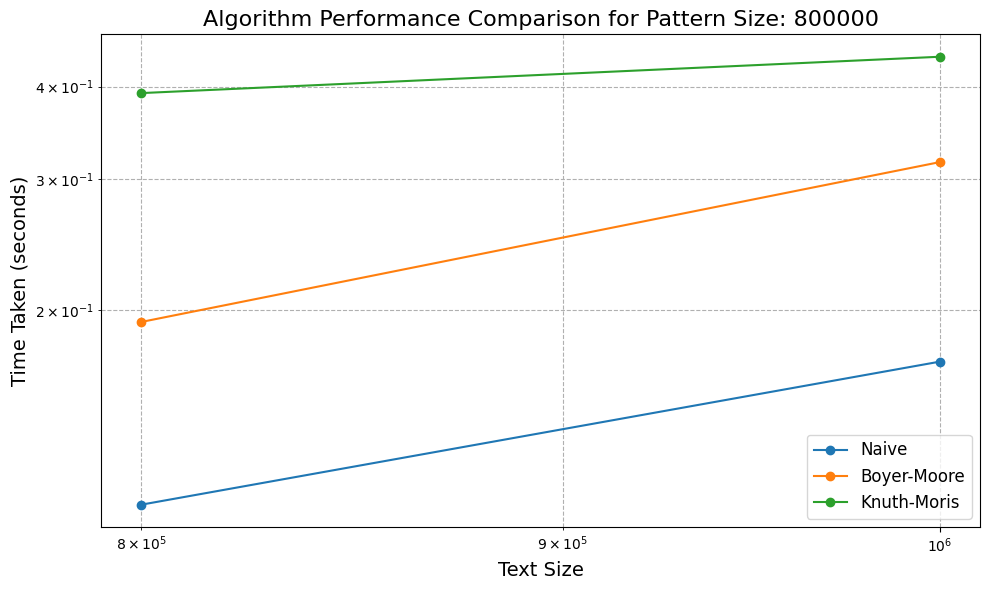

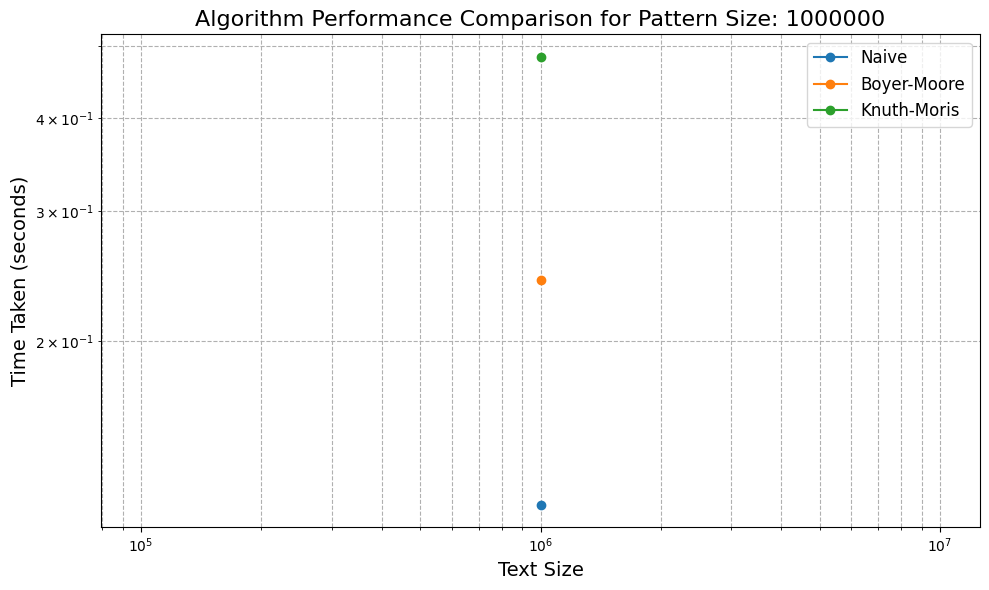

In [ ]:
# Visualizing
visualize_all_results(all_results)

# 2.1 Prove Complexity

### Remark
Number of steps can be shown analytically, so I did not include it in the testing code

## Naive

### Time Complexity

The time complexity of the Naive algorithm is O(n * m), where:

- n is the length of the text.
- m is the length of the pattern.

Explanation:

1. The outer loop runs approximately n - m + 1 times, iterating over each possible starting index in the text where the pattern could match.
2. For each iteration of the outer loop, the inner loop may run up to m times to compare each character of the pattern with the corresponding substring in the text.
3. In the worst-case scenario, the inner loop performs maximum number of iterations for each position in the text, leading to a total time complexity of O(n * m).

### Space Complexity

The space complexity of the Naive approach is O(n).

Explanation:

1. The only space-consuming data structure is the result list.
2. In the worst-case scenario, where the pattern occurs at every position in the text, the result list could store up to n indices.
3. Thus, the overall space complexity is dominated by the result list, resulting in O(n) space complexity.

### Testing Results

As one can see on the plots above, Naive generally takes the most time.

The only exception is when pattern size is close to the text size. In that scenario, Naive runs faster, since it does not take time to preprocess neither text of pattern.

## Aho-Corasik

### Time Complexity

1. **Tree Construction**:
    - Building the tree requires adding each character of each keyword into the tree.
    - Let `n` be the total number of characters in all keywords combined. The construction takes \(O(n)\) time.

2. **Failure Link Construction**:
    - Each node in the trie is processed once, and for each character in the alphabet, we may traverse up the failure links. The amortized cost of these operations is \(O(n)\), as each character in the trie is processed a constant number of times.

3. **Search**:
    - Each character in the input text is processed once, moving through the trie or following failure links. If \(m\) is the length of the text, this step takes \(O(m)\) time.

Overall time complexity: \(O(n + m)\).


### Space Complexity

1. **Tree Storage**:
    - The Tree requires \(O(n)\) space to store all nodes and edges corresponding to the input keywords.

2. **Failure Links**:
    - Each node in the trie has at most one failure link, contributing \(O(n)\) space.

3. **Output Storage**:
    - The output dictionary stores matching patterns for nodes, requiring \(O(n)\) space.

Overall space complexity: \(O(n)\).



## KMP

### Time Complexity

1. **LPS Array Computation**:
    - The `compute_lps` function processes each character of the pattern at most twice: once while iterating forward and once while adjusting the `length` pointer.
    - Let \(m\) be the length of the pattern. The LPS computation takes \(O(m)\) time.

2. **Pattern Search**:
    - During the search, each character of the text is matched or causes a shift using the LPS array.
    - Let \(n\) be the length of the text. Each character is processed at most twice (once for matching and once for mismatching/adjusting the `j` pointer).
    - The search takes \(O(n)\) time.

Overall time complexity: \(O(n + m)\).


### Space Complexity

1. **LPS Array**:
    - The LPS array stores \(m\) integers, requiring \(O(m)\) space.

2. **Additional Variables**:
    - Other variables such as indices and result storage require \(O(1)\) additional space.

Overall space complexity: \(O(m)\).


## Boyer-Moore

### Time Complexity.

Preprocessing takes $O(m)$, where $m$ - length of the patter.

In the worst case, algorithm will be making shift of size 1 through the whole text, resulting in comparing $m$ characters from the pattern $n$ times, where $m$ - length of the patter, $n$ - length of the text.

Thus, time complexity is $O(n*m)$.

### Space Complexity

During preprocessing stage we create a dictionary of size $u$, where $u$ - number of unique characters in the pattern.

So, space complexity is $O(u)$